In [1]:
from strategiesavg import *
from data import *
import matplotlib.pyplot as plt

In [2]:
# Raw
d0 = get_hf_data()
# Outliers
d1 = get_hf_data(filter_outliers=True)
# Scaling
d2 = get_hf_data(scaling='z-score')
d3 = get_hf_data(scaling='minmax')
# Outliers and scaling
d4 = get_hf_data(filter_outliers=True, scaling='z-score')
d5 = get_hf_data(filter_outliers=True, scaling='minmax')

# dfs = [d0,d1,d2,d3,d4,d5]
dfs = [d0,d1]
balancings = [None, 'undersample', 'oversample', 'smote']

100%|██████████| 180/180 [00:24<00:00,  7.24it/s]


max_depth, max_features, n_estimators
Index:  0 balancing: None
Accuracy: 0.77
Params: (10, 1, 10)


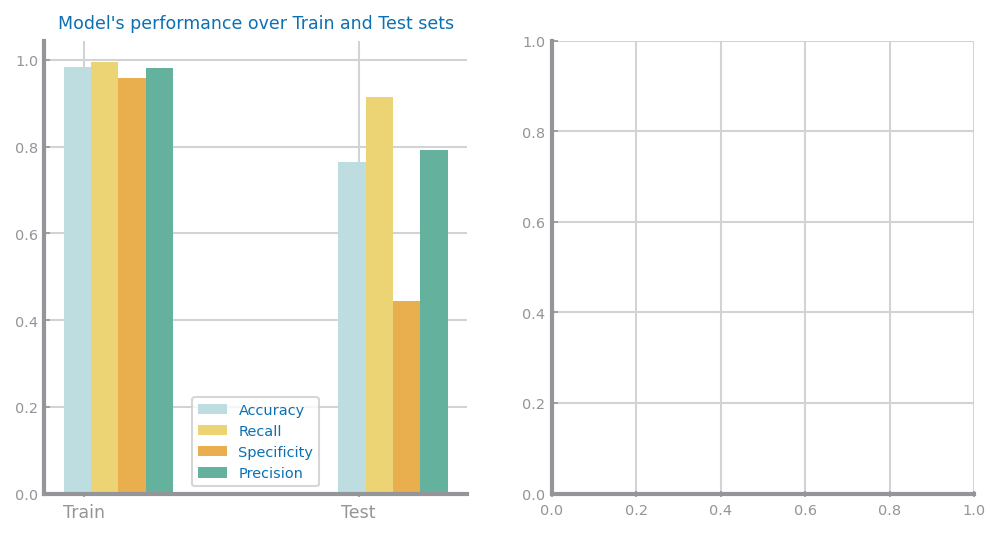

  2%|▏         | 4/180 [00:00<00:05, 33.62it/s]

Results: {'Accuracy': [0.9832670850767085, 0.7657627118644068], 'Recall': [0.9950617283950617, 0.9157317073170732], 'Specificity': [0.9582706766917293, 0.4436842105263158], 'Precision': [0.9806474948065551, 0.7932130154527599]}

------




100%|██████████| 180/180 [00:23<00:00,  7.59it/s]


max_depth, max_features, n_estimators
Index:  0 balancing: undersample
Accuracy: 0.74
Params: (5, 0.1, 100)


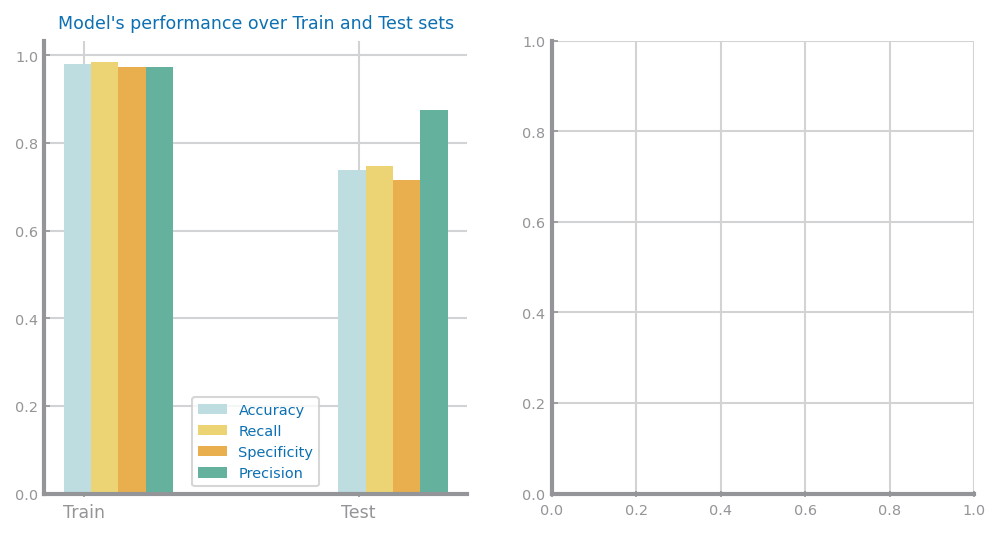

  2%|▏         | 4/180 [00:00<00:05, 29.85it/s]

Results: {'Accuracy': [0.9791866028708134, 0.7392655367231639], 'Recall': [0.9843814080656186, 0.7482926829268293], 'Specificity': [0.9739917976760082, 0.7157894736842105], 'Precision': [0.9744163292847503, 0.8762247815078004]}

------




100%|██████████| 180/180 [00:26<00:00,  6.74it/s]


max_depth, max_features, n_estimators
Index:  0 balancing: oversample
Accuracy: 0.77
Params: (10, 1, 150)


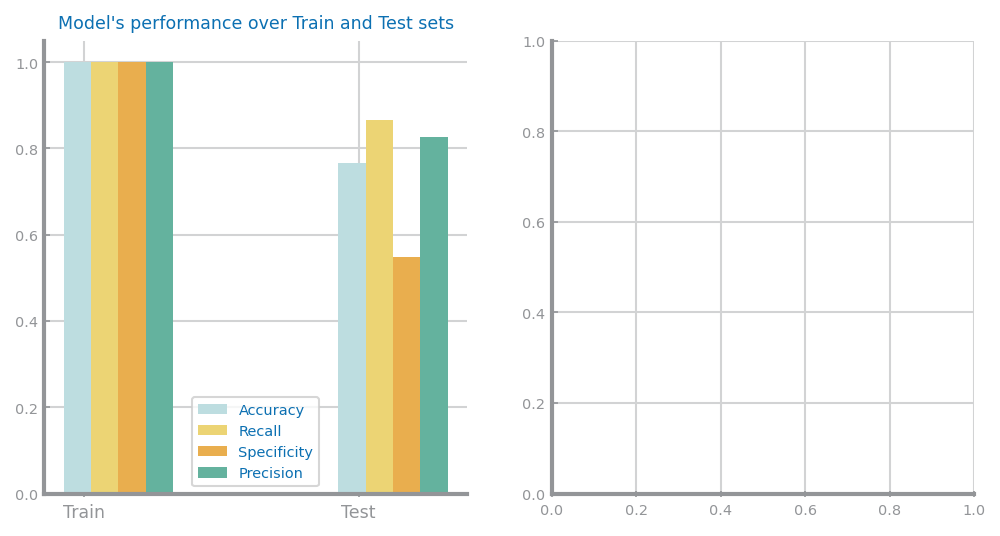

  2%|▏         | 4/180 [00:00<00:05, 29.76it/s]

Results: {'Accuracy': [1.0, 0.7657627118644068], 'Recall': [1.0, 0.8665853658536585], 'Specificity': [1.0, 0.5473684210526316], 'Precision': [1.0, 0.8273491214667685]}

------




100%|██████████| 180/180 [00:26<00:00,  6.78it/s]


max_depth, max_features, n_estimators
Index:  0 balancing: smote
Accuracy: 0.77
Params: (10, 0.1, 25)


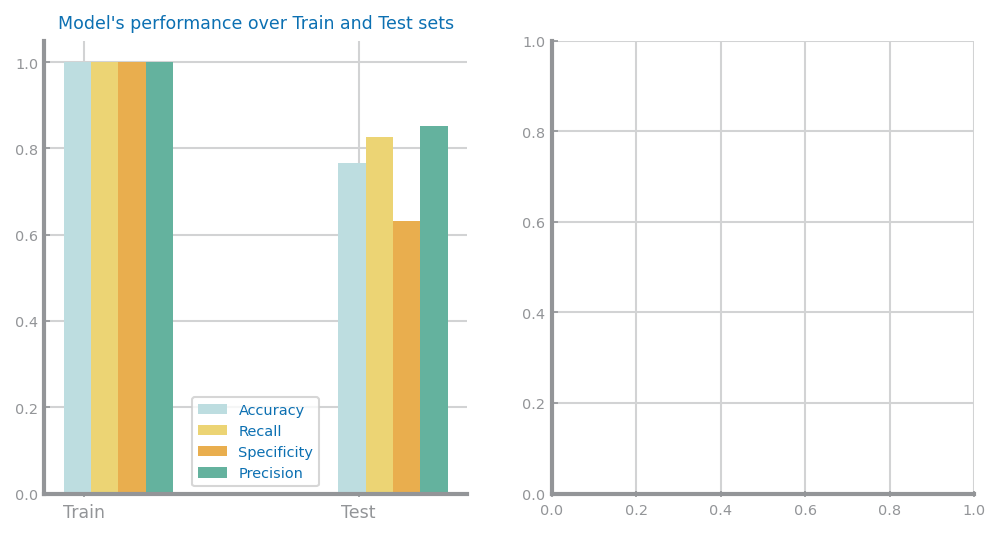

  2%|▏         | 4/180 [00:00<00:05, 32.88it/s]

Results: {'Accuracy': [1.0, 0.765819209039548], 'Recall': [1.0, 0.8269512195121951], 'Specificity': [1.0, 0.631578947368421], 'Precision': [1.0, 0.8510699737018512]}

------




100%|██████████| 180/180 [00:26<00:00,  6.68it/s]


max_depth, max_features, n_estimators
Index:  1 balancing: None
Accuracy: 0.76
Params: (25, 1, 75)


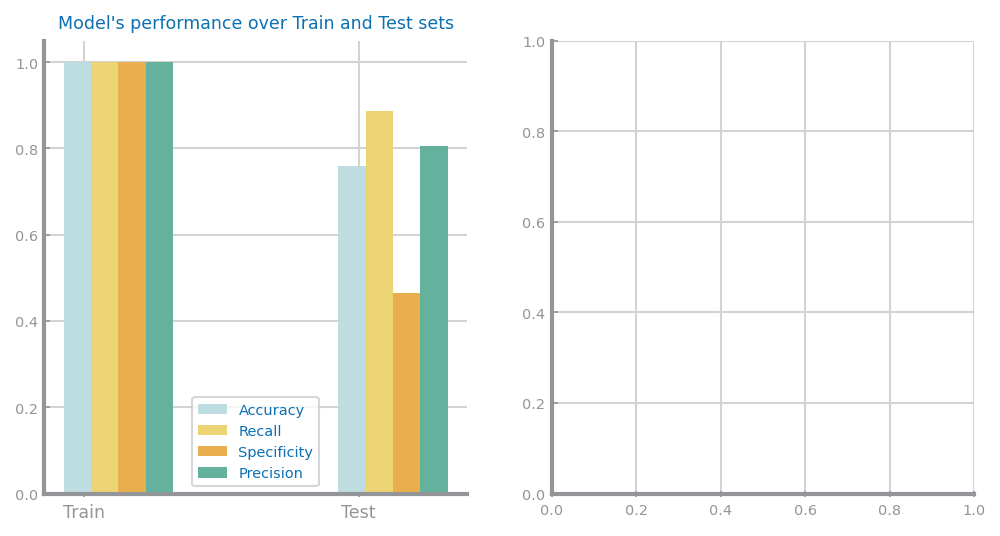

  2%|▏         | 4/180 [00:00<00:05, 33.10it/s]

Results: {'Accuracy': [1.0, 0.7595238095238095], 'Recall': [1.0, 0.8876923076923077], 'Specificity': [1.0, 0.4647058823529412], 'Precision': [1.0, 0.8068193843193844]}

------




100%|██████████| 180/180 [00:24<00:00,  7.32it/s]


max_depth, max_features, n_estimators
Index:  1 balancing: undersample
Accuracy: 0.75
Params: (25, 1, 10)


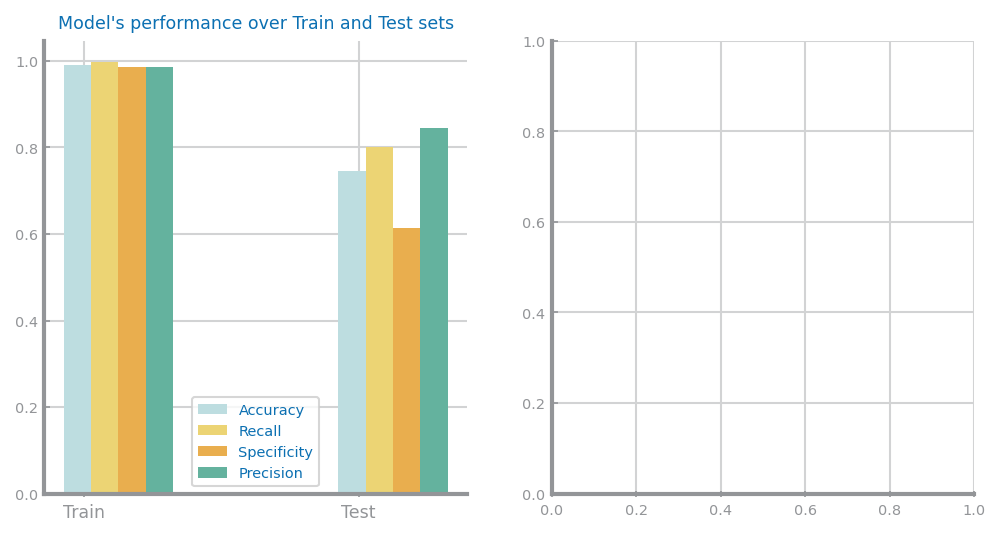

  2%|▏         | 4/180 [00:00<00:05, 30.24it/s]

Results: {'Accuracy': [0.9913871635610766, 0.7457393483709273], 'Recall': [0.9971428571428571, 0.8006410256410257], 'Specificity': [0.9856314699792961, 0.6150326797385621], 'Precision': [0.9859534987704002, 0.8447088263293894]}

------




100%|██████████| 180/180 [00:28<00:00,  6.23it/s]


max_depth, max_features, n_estimators
Index:  1 balancing: oversample
Accuracy: 0.76
Params: (25, 0.1, 300)


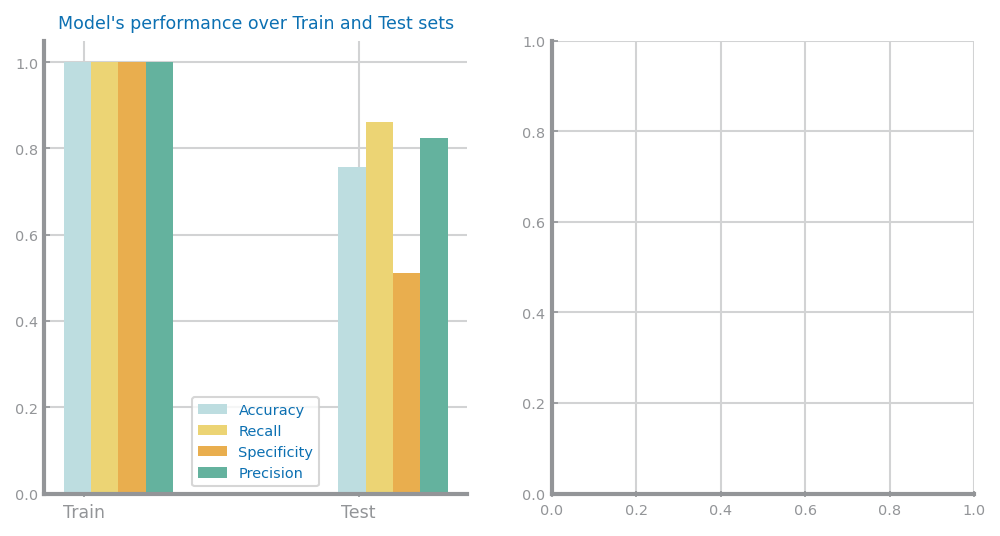

  2%|▏         | 4/180 [00:00<00:05, 33.21it/s]

Results: {'Accuracy': [1.0, 0.7560150375939849], 'Recall': [1.0, 0.8620512820512821], 'Specificity': [1.0, 0.5104575163398692], 'Precision': [1.0, 0.8232850241545894]}

------




100%|██████████| 180/180 [00:28<00:00,  6.30it/s]


max_depth, max_features, n_estimators
Index:  1 balancing: smote
Accuracy: 0.77
Params: (10, 1, 25)


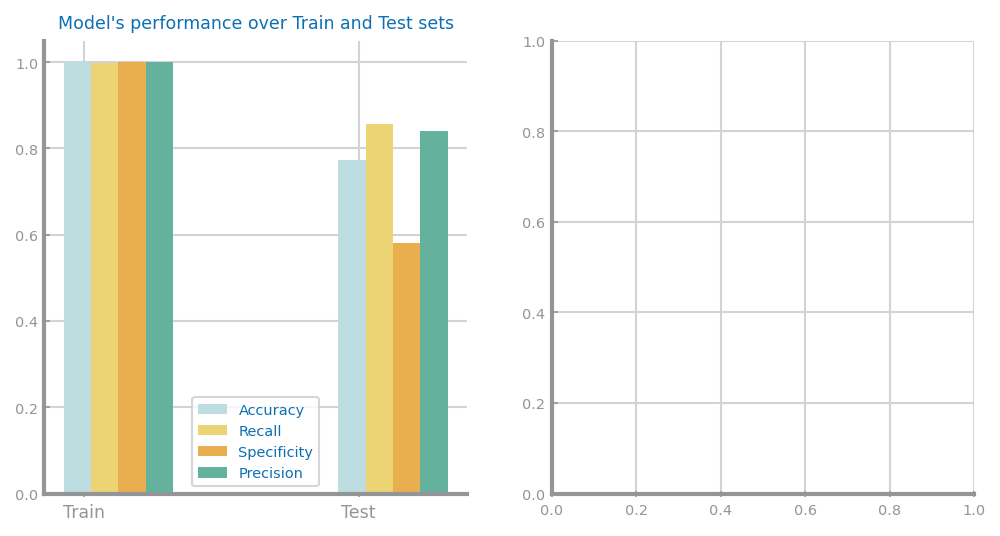

Results: {'Accuracy': [0.9993589743589744, 0.7734962406015038], 'Recall': [0.9987179487179487, 0.8569230769230769], 'Specificity': [1.0, 0.5810457516339869], 'Precision': [1.0, 0.8414728682170542]}

------


('1,smote', 0.7734962406015038)


In [3]:
best = ("", 0)

for i, df in enumerate(dfs):
    for bal in balancings:
        params, results = RandomForestsKFold(df, "DEATH_EVENT", balancing=bal)
        accuracy = results["Accuracy"][1]
        print("Index: ", i, "balancing:", bal)
        print(f'Accuracy: {accuracy:.2f}')
        print(f'Params: {params}')
        plt.pause(0.1)
        print("Results:", results)
        print("\n------\n\n")
        if (accuracy > best[1]):
            if bal == None: bal = "None"
            best = (str(i) + "," + bal, accuracy)
            
print(best)

In [1]:
from strategies import randomForests
